In [5]:
using JLD, Plots
gr()
using HDF5
push!(LOAD_PATH,".")
#include("EntropySymb.jl")
#include("ArbolGrafosTikz.jl")
using ArbolGrafosTikz
using EntropySymb


In [6]:
arxname="../JLDFiles/Evocada/control1/LFP_Promedio_est_con5.jld"
datos=load(arxname)
csd=datos["kCSDCorrecta"]
lfp=datos["LFPSaturados"]
freq=datos["freq"]
retr=datos["retrazo"]
lat=datos["latencia"]
cresp=datos["Canalesrespuesta"]
csatu=datos["CanalesSaturados"];

ErrorException: File ../JLDFiles/Evocada/control1/LFP_Promedio_est_con5.jld cannot be found

In [7]:
(h,w,nmax)=size(csd)
epsi=30
  ss=[-1,0,1];

UndefVarError: UndefVarError: csd not defined

In [8]:
datos

UndefVarError: UndefVarError: datos not defined

In [9]:
csdsymb=map(x->simboliza(x,epsi), csd);

UndefVarError: UndefVarError: csd not defined

In [10]:
xs=csdsymb[16,28,:];
ys=[1]

UndefVarError: UndefVarError: csdsymb not defined

Haciendo pruebas, al parecer matar el conjunto de malas con entre 3 y 4 letras es la forma más rapida. Ya despues de eso tiene que revisar palabrerias tan largas que no conviene.

In [7]:
@time (p, v3)=allprobsn(xs, ss, 3)

  0.355956 seconds (855.05 k allocations: 44.925 MiB, 3.59% gc time)


(Dict{Array,Float64}([-1, -1, 0]=>0.000861326,[0, -1, -1]=>0.000861326,[0, 0, 0]=>0.96124,[-1, 0, 0]=>0.000861326,[0, 0, -1]=>0.000861326,[-1, -1, -1]=>0.0353144), Set(Any[[1, -1, -1], [-1, 1, 1], [-1, 1, 0], [-1, 0, -1], [1, 0, -1], [1, 0, 1], [-1, -1, 1], [1, 1, 1], [1, -1, 0], [0, 1, 0]  …  [0, 1, -1], [-1, 0, 1], [0, -1, 0], [1, 0, 0], [0, 0, 1], [1, -1, 1], [1, 1, -1], [1, 1, 0], [0, -1, 1], [-1, 1, -1], [0, 1, 1]]))

In [8]:
length(v3)

21

In [9]:
@time (ar, ir)=EntropySymb.allprobsn(xs, ss,11, v3);

  0.946072 seconds (9.02 M allocations: 856.538 MiB, 16.84% gc time)


In [10]:
lmax=length(cresp)

359

In [11]:
log(3, nmax)

6.425158561694472

In [12]:
hhsn=Dict{Array{Int, 1}, Array{Float64,1}}()
hhsn2=Dict{Array{Int, 1}, Array{Float64,1}}()
arbol=Dict{Array{Int,1}, Dict{Int, Array}}()
nn=7
@time for c in cresp
        reng=c[1]
        col=c[2]
        xs=csdsymb[reng,col,:]
        hhsn[c]=zeros(nn)
        arbol[c]=Dict{Int, Array}()
     #   arbol[c][0]=[[]]
    for n=1:nn
            v=Set()
        if n<4
            probs, v= EntropySymb.allprobsn(xs, ss,n)
        else
            probs, v2= EntropySymb.allprobsn(xs, ss,n, v)
        end
            buenas=sort(collect(keys(probs)))
            arbol[[reng, col]][n]=buenas
            hhsn[[reng,col]][n]=shanonH_n(probs,n)
            
    end
    
end


120.219706 seconds (1.37 G allocations: 175.880 GiB, 32.73% gc time)


In [13]:
arbex=arbol[[19,36]]

Dict{Int64,Array} with 7 entries:
  7 => Array[[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, 0], [-1, -1…
  4 => Array[[-1, -1, -1, -1], [-1, -1, -1, 0], [-1, -1, 0, -1], [-1, 0, -1, 0]…
  2 => Array[[-1, -1], [-1, 0], [0, -1], [0, 0]]
  3 => Array[[-1, -1, -1], [-1, -1, 0], [-1, 0, -1], [-1, 0, 0], [0, -1, -1], […
  5 => Array[[-1, -1, -1, -1, -1], [-1, -1, -1, -1, 0], [-1, -1, -1, 0, -1], [-…
  6 => Array[[-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 0], [-1, -1, -1, -1…
  1 => Array[[-1], [0]]

In [14]:
   amigosfelices=Set()
    otrosamigos=Set()
for c in cresp
    a=arbol[c][1]
    h=hhsn[c][7]
    tol=0.00005
    if  !(in([1], a)) 
        if isapprox(h, 0.03105, atol=tol)
             println(c," \t ", h, " ", arbol[c][1], "huy" )
             push!(amigosfelices, c)
        elseif isapprox(h, 0.028169, atol=tol)
               println(c," \t ", h, " ", arbol[c][1], "yea" )
             push!(otrosamigos, c)
        else
              println(c," \t ", h, " ", arbol[c][1] )
        end
    end
end

[19, 35] 	 0.03039139756085729 Array[[-1], [0]]
[17, 35] 	 0.030823791361465052 Array[[-1], [0]]
[20, 35] 	 0.03203960450968174 Array[[-1], [0]]
[22, 33] 	 0.03704277507823611 Array[[-1], [0]]
[15, 36] 	 0.03039139756085729 Array[[-1], [0]]
[24, 32] 	 0.03647180195787973 Array[[-1], [0]]
[20, 34] 	 0.030823791361465052 Array[[-1], [0]]
[18, 35] 	 0.03039139756085729 Array[[-1], [0]]
[20, 37] 	 0.046210865337704445 Array[[-1], [0]]
[21, 36] 	 0.04893031096808592 Array[[-1], [0]]
[20, 36] 	 0.049214717982765645 Array[[-1], [0]]
[22, 36] 	 0.05013532741225516 Array[[-1], [0]]
[19, 36] 	 0.03105005456766734 Array[[-1], [0]]huy
[19, 32] 	 0.03209892265944408 Array[[-1], [0]]
[23, 31] 	 0.03647180195787973 Array[[-1], [0]]
[16, 37] 	 0.03203960450968174 Array[[-1], [0]]
[23, 34] 	 0.051464814607492616 Array[[-1], [0]]
[18, 36] 	 0.03203960450968174 Array[[-1], [0]]
[16, 35] 	 0.030823791361465052 Array[[-1], [0]]
[17, 36] 	 0.03039139756085729 Array[[-1], [0]]
[15, 37] 	 0.03039139756085729 

In [15]:
amigosfelices

Set(Any[[19, 36]])

In [17]:
csdsymb[20,34,end-100:end]

101-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [18]:
function structtreefromDict(datos::Dict, niveles::Int)
    ramerio=Subarbol[]
    for n=1:(niveles-1)
    for a in datos[n]
        nodito=Nodo(a)
        jijov=Nodo[]
        arbolillo=Subarbol(nodito,jijov)
        for b in datos[n+1]
            if a==b[1:end-1] # si b pro
                ramita=Nodo(b)
                push!(arbolillo.hijos, ramita)
            end
        end
        push!(ramerio,arbolillo)
        end
    end

    arbolfull=Arbol(ramerio)
    return arbolfull
end

structtreefromDict (generic function with 1 method)

In [19]:
@time arbolfull=structtreefromDict(arbex,7)

  0.067360 seconds (73.07 k allocations: 3.717 MiB)


Arbol(Subarbol[Subarbol(Nodo([-1]), Nodo[Nodo([-1, -1]), Nodo([-1, 0])]), Subarbol(Nodo([0]), Nodo[Nodo([0, -1]), Nodo([0, 0])]), Subarbol(Nodo([-1, -1]), Nodo[Nodo([-1, -1, -1]), Nodo([-1, -1, 0])]), Subarbol(Nodo([-1, 0]), Nodo[Nodo([-1, 0, -1]), Nodo([-1, 0, 0])]), Subarbol(Nodo([0, -1]), Nodo[Nodo([0, -1, -1]), Nodo([0, -1, 0])]), Subarbol(Nodo([0, 0]), Nodo[Nodo([0, 0, -1]), Nodo([0, 0, 0])]), Subarbol(Nodo([-1, -1, -1]), Nodo[Nodo([-1, -1, -1, -1]), Nodo([-1, -1, -1, 0])]), Subarbol(Nodo([-1, -1, 0]), Nodo[Nodo([-1, -1, 0, -1])]), Subarbol(Nodo([-1, 0, -1]), Nodo[Nodo([-1, 0, -1, 0])]), Subarbol(Nodo([-1, 0, 0]), Nodo[Nodo([-1, 0, 0, 0])])  …  Subarbol(Nodo([-1, -1, 0, -1, 0, 0]), Nodo[Nodo([-1, -1, 0, -1, 0, 0, 0])]), Subarbol(Nodo([-1, 0, -1, 0, 0, 0]), Nodo[Nodo([-1, 0, -1, 0, 0, 0, 0])]), Subarbol(Nodo([-1, 0, 0, 0, 0, 0]), Nodo[Nodo([-1, 0, 0, 0, 0, 0, 0])]), Subarbol(Nodo([0, -1, -1, -1, -1, -1]), Nodo[Nodo([0, -1, -1, -1, -1, -1, -1])]), Subarbol(Nodo([0, -1, 0, 0, 0, 0]),

In [20]:
grafodelArbol=walk_tree(arbolfull)

LabelledTree({66, 64} directed simple Int64 graph, Any[[-1], [-1, -1], [-1, 0], [0], [0, -1], [0, 0], [-1, -1, -1], [-1, -1, 0], [-1, 0, -1], [-1, 0, 0]  …  [-1, 0, -1, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0], [0, -1, -1, -1, -1, -1, -1], [0, -1, 0, 0, 0, 0, 0], [0, 0, -1, -1, -1, -1, -1], [0, 0, 0, -1, -1, -1, -1], [0, 0, 0, 0, -1, -1, -1], [0, 0, 0, 0, 0, -1, -1], [0, 0, 0, 0, 0, 0, -1], [0, 0, 0, 0, 0, 0, 0]])

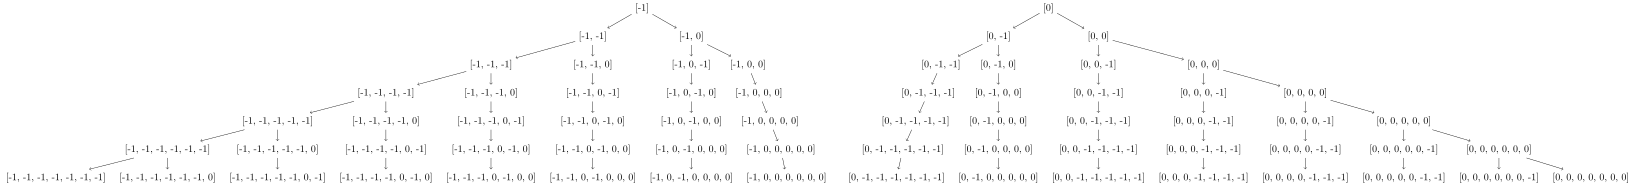

In [21]:
blabla=tikz_representation(grafodelArbol)

In [22]:
xxx=[]
yyy=[]
gord1=[]
gord2=[]
for k in keys(hhsn)
    push!(xxx, k[2])
    push!(yyy, k[1])
    push!(gord1, hhsn[k][1])
    push!(gord2, hhsn[k][end])
end
    

xx=[]
yy=[]

for k in amigosfelices
    push!(xx,k[2])
    push!(yy,k[1])
end

xs=[]
ys=[]

for k in otrosamigos
     push!(xs,k[2])
    push!(ys,k[1])
end

┌ Warning: Skipped marker arg x.
└ @ Plots /home/karel/.julia/packages/Plots/47Tik/src/args.jl:745
┌ Warning: Skipped marker arg x.
└ @ Plots /home/karel/.julia/packages/Plots/47Tik/src/args.jl:745


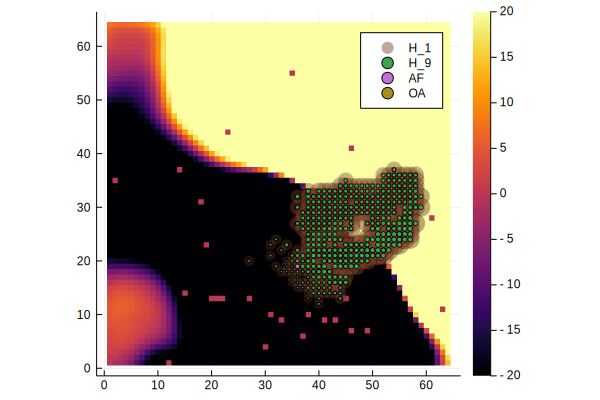

In [23]:
ppp=heatmap(csd[:,:,100], aspect_ratio=1, clims=(-20,20))
f=35
scatter!(xxx, yyy, markersize=gord1.*f, label="H_1", markeralpha=gord1)
scatter!(xxx, yyy, markersize=gord2.*f, label="H_9")
scatter!(xx, yy, markersize=2, label="AF", marker="x")
scatter!(xs, ys, markersize=2, label="OA", marker="x")


In [24]:
pp=plot(ylim=(-200,200), yticks=-200:25:200)
for k in amigosfelices
    j=k[1]
    l=k[2]
    plot!(pp,csd[j,l,:], linewidth=1.5, color="grey")
end

for k in otrosamigos
    j=k[1]
    l=k[2]
    plot!(pp,csd[j,l,:], linewidth=0.5, color="blue")
end



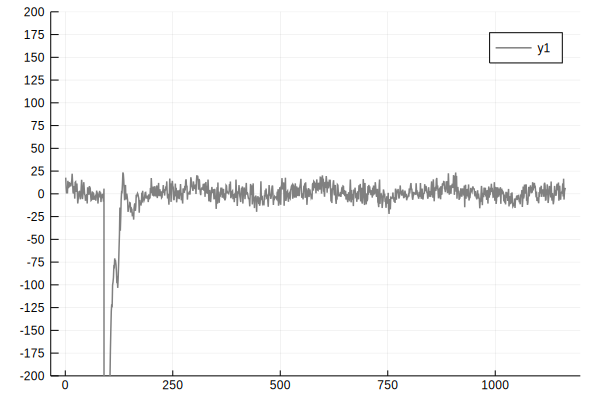

In [25]:
pp

In [26]:
pp=plot(key=false)
for k in cresp
    j=k[1]
    l=k[2]
     plot!(pp,csdsymb[j,l,:], linewidth=0.5)
end

In [32]:
NotebookApp.iopub_data_rate_limit

UndefVarError: UndefVarError: NotebookApp not defined

In [27]:
pp

In [34]:
using LightGraphs, GraphPlot

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/GraphPlot/bUwXr.ji for GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1190


In [35]:
using TikzGraphs

In [36]:
TikzGraphs.plot(arg)

UndefVarError: UndefVarError: arg not defined

In [37]:
arg=Graph(A)

UndefVarError: UndefVarError: A not defined

In [38]:
TikzGraphs.plot(arg)

UndefVarError: UndefVarError: arg not defined

In [39]:
rem_vertex!(arg, 5)

UndefVarError: UndefVarError: arg not defined

In [40]:
TikzGraphs.plot(arg)

UndefVarError: UndefVarError: arg not defined

In [41]:
arbol1=Graph(adja)

UndefVarError: UndefVarError: adja not defined

In [42]:
palos=edges(arbol1)

UndefVarError: UndefVarError: arbol1 not defined

In [43]:
nodos=collect(vertices(arbol1));


UndefVarError: UndefVarError: arbol1 not defined

In [44]:
arbol1podado=Graph()

{0, 0} undirected simple Int64 graph

In [45]:
for q in palos 
    print(q)
    add_edge!(arbol1podado,q)
end

UndefVarError: UndefVarError: palos not defined

In [46]:
palos[1]

UndefVarError: UndefVarError: palos not defined

In [47]:
TikzGraphs.plot(arbol1)

UndefVarError: UndefVarError: arbol1 not defined

In [48]:
max1=maximum(aar)
max8=maximum(bbr)

UndefVarError: UndefVarError: aar not defined

In [49]:
for k in keys(hhsn)
    if hhsn[k][1]==min1
        print(k, " es el min de 1 bloque. ")
    elseif hhsn[k][1]==max1
        print(k, " es el max de 1 bloque. ")
    end
   if hhsn[k][8]==min8
        print(k, " es el min de 8 bloque. ")
    elseif hhsn[k][8]==max8
        print(k, " es el max de 8 bloque. ")
    end
end


UndefVarError: UndefVarError: min1 not defined

In [50]:
hhsn[:,:,1]==hhsn[:,:,4]

KeyError: KeyError: key (Colon(), Colon(), 1) not found

In [51]:
allprobsn(xs, ss, 3)

ErrorException: La secuencia objetivo es mayor a la secuencia para buscar.

In [52]:
ss=[-1,0,1]
bla=[[q, j] for q in ss, j in ss ]

3×3 Array{Array{Int64,1},2}:
 [-1, -1]  [-1, 0]  [-1, 1]
 [0, -1]   [0, 0]   [0, 1] 
 [1, -1]   [1, 0]   [1, 1] 

In [53]:
?Nodo

search: Nodo unicodeplots bellman_ford_shortest_paths UndefKeywordError



No documentation found.

# Summary

```
mutable struct Nodo <: Any
```

# Fields

```
nombre :: Any
```


In [54]:
struct fobar
    fo
    bar
end

In [55]:
a=fobar(1,2)

fobar(1, 2)

In [56]:
problock(xs, [1]) , problock(xs, [0]),problock(xs, [-1])

ErrorException: La secuencia objetivo es mayor a la secuencia para buscar.

In [57]:
heatmap(sumsym, aspect_ratio=1)

UndefVarError: UndefVarError: sumsym not defined

In [58]:
?heatmap

search: heatmap heatmap! plots_heatmap plots_heatmap!



```
heatmap(x,y,z)
heatmap!(x,y,z)
```

Plot a heatmap of the rectangular array `z`. 

# Example

```julia-repl
julia> heatmap(randn(10,10))
```


In [59]:
a=[0,1]
n=[0, 1]
z=[1,1,0]
z2=[1,0,1]

3-element Array{Int64,1}:
 1
 0
 1

In [60]:
@time issubvec(a, z2)

  0.000006 seconds (10 allocations: 560 bytes)


true

In [61]:
@inbounds

LoadError: MethodError: no method matching @inbounds(::LineNumberNode, ::Module)
Closest candidates are:
  @inbounds(::LineNumberNode, ::Module, !Matched::Any) at essentials.jl:538

In [62]:
as=string(a)

"[0, 1]"